In [ ]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.src.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset de keras
(trainXT, trainYT), (testX, testY) = mnist.load_data()
# dividir los datos de training 20% para la validacion
trainX, valX, trainY, valY = train_test_split(trainXT,trainYT,test_size = 0.2,random_state = 42)
# one hot encode
trainY = to_categorical(trainY)
testY = to_categorical(testY)
valY = to_categorical(valY)
# normalizar los datos
trainX = trainX/255.0
valX = valX/255.0
testX = testX/255.0

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
def ploteo(hist):
  print(hist)
  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  sns.lineplot(data=hist.loc[:10, ['loss', 'val_loss']])
  plt.subplot(122)
  sns.lineplot(data=hist.loc[:30, ['accuracy', 'val_accuracy']]);

In [ ]:
def model():
  model = Sequential()
  model.add(Conv2D(32,(3, 3),activation='relu',input_shape=(28, 28, 1)))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(124, activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.summary()
  model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
  return model

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_27 (Flatten)        (None, 5408)              0         
                                                                 
 dense_51 (Dense)            (None, 124)               670716    
                                                                 
 dense_52 (Dense)            (None, 10)                1250      
                                                                 
Total params: 672286 (2.56 MB)
Trainable params: 672286 (2.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

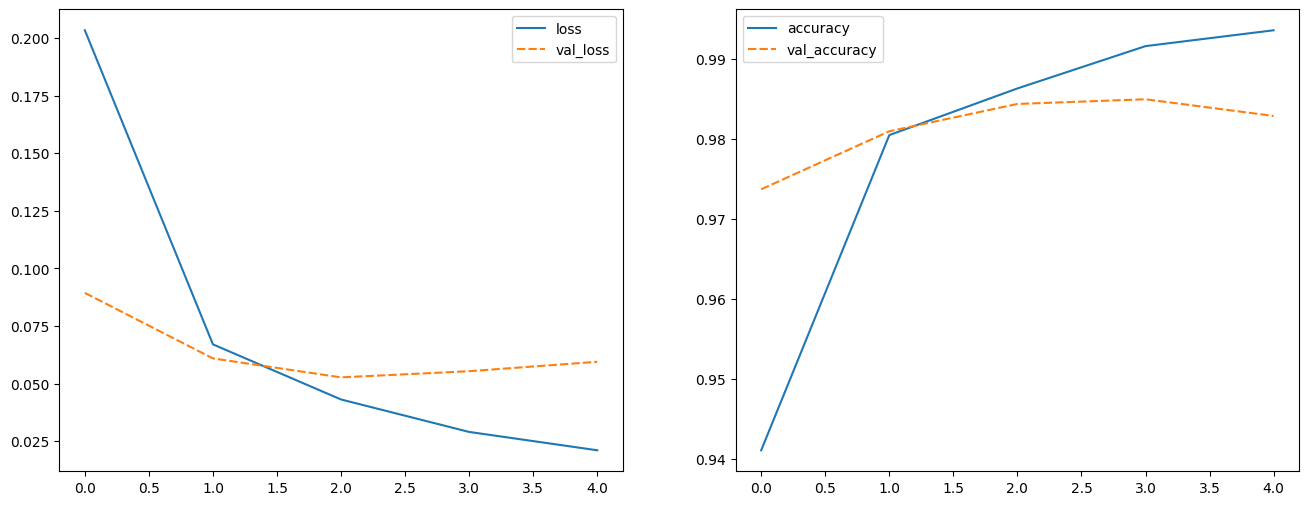

In [ ]:
#cantidad de epocas
epoch = 5 # o 10, 15,20
# modelo 1
model = model()
#fit model
history = model.fit(trainX, trainY, epochs=epoch, batch_size=64, validation_data=(valX, valY), verbose=1)
# learning curves
history_f = pd.DataFrame(model.history.history)
ploteo(history_f)

313/313 [==============================] - 2s 7ms/step


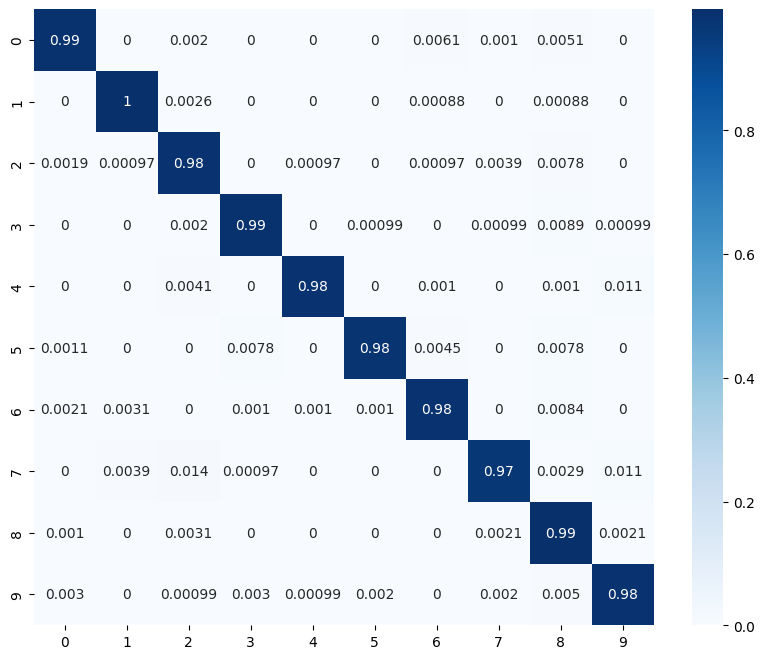

In [ ]:
y_pred = model.predict(testX)
matrix = confusion_matrix(testY.argmax(axis=1), y_pred.argmax(axis=1))
r = matrix / matrix.sum(axis=1).reshape(-1, 1)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(r, cmap=plt.cm.Blues, annot=True);